<a href="https://colab.research.google.com/github/tomfox1/DS-Unit-2-Sprint-2-Regression/blob/master/module3-regression-diagnostics/Copy_of_Model_Diagnostics_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression Diagnostics

The purpose of this assigment is introduce you to a new library for linear regression called statmodels which is much better suited for inferential modeling than sklearn. This assignment is also to familiarize yourself with some of most important procedures for improving the interpretability of regression coefficients. You will also perform important statistical tests that will help establish that whether or not important assumptions that safeguard the interpretability of OLS coefficients have been met. 

We will continue to use the Ames Housing Dataset so that you can focus on the techniques and not on cleaning/getting associated with a brand new dataset.

In [0]:
%matplotlib inline
import seaborn as sns
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy import stats

## 1.1 Choose an X and Y variable from your dataset and use them to create a Seaborn Regplot

In [2]:
url = "https://raw.githubusercontent.com/ryanleeallred/datasets/master/kc_house_data.csv"
df = pd.read_csv(url)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


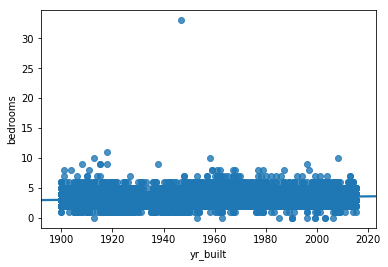

In [3]:
sns.regplot(x = "yr_built", y="bedrooms", data=df);

## 1.2 Now using the X variables that you feel like will be the best predictors of y use statsmodel to run the multiple regression between these variables and Y. You don't need to use every X variable in your dataset, in fact it's probably better if you don't. Just pick ones that you have already cleaned that seem the most relevant to house prices.

In [4]:
features = ["floors"]

target = ["price"]

X = df[features]
y = df[target]

model = sm.OLS(y, sm.add_constant(X))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                  0.066
Method:                 Least Squares   F-statistic:                     1526.
Date:                Wed, 01 May 2019   Prob (F-statistic):          1.58e-322
Time:                        22:43:53   Log-Likelihood:            -3.0687e+05
No. Observations:               21613   AIC:                         6.137e+05
Df Residuals:                   21611   BIC:                         6.138e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.792e+05   7101.851     39.313      0.0

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


## 1.3 Identify the standard errors and P-Values of these coefficients in the output table. What is the interpretation of the P-values here?

In [0]:
#Our p-values are < 0.05 and thus statistically significant
#we reject the null hypothesis that our regressors coefficient equals 0
#in other words, the inclusion of the independent variable is useful in our model 

## 1.4 Remove outliers from your dataset and run the regression again. Do you see a change in some coefficients? Which seem to move the most?

In [7]:
df = df.drop(columns=['id','date','zipcode','lat','long','yr_renovated'])

print(df.shape)
df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]
print(df.shape)

(21613, 15)
(19628, 15)


In [8]:
features = ["floors"]
target = ["price"]

X1 = df[features]
y1 = df[target]
X1.shape, y1.shape

((19628, 1), (19628, 1))

In [9]:
#our R-squared stat is higher meaning model's regressor's variance better explained by model 
#std err for our regressor is lower, 
#JB sore is lower meaning errors are more normally distributed 

model = sm.OLS(y1, sm.add_constant(X1))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.078
Model:                            OLS   Adj. R-squared:                  0.077
Method:                 Least Squares   F-statistic:                     1650.
Date:                Wed, 01 May 2019   Prob (F-statistic):               0.00
Time:                        22:44:37   Log-Likelihood:            -2.6977e+05
No. Observations:               19628   AIC:                         5.395e+05
Df Residuals:                   19626   BIC:                         5.396e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.044e+05   4710.877     64.608      0.0

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


## 1.5 Create a new log(y) variable and use it to run a log-linear regression of your variables using statmodels 

In [11]:
#log-linear regression 

df["log_price"] = np.log(df["price"])


features = ["floors"]
target = ["log_price"]

X2 = df[features]
y2 = df[target]

model = sm.OLS(y2, sm.add_constant(X2))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     1916.
Date:                Wed, 01 May 2019   Prob (F-statistic):               0.00
Time:                        22:45:22   Log-Likelihood:                -11817.
No. Observations:               19628   AIC:                         2.364e+04
Df Residuals:                   19626   BIC:                         2.365e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.6030      0.009   1364.183      0.0

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


## 2.1 Run a test for high levels of collinearity in your dataset. Calculate the Variance Inflation Factor for each X variable. Do you see VIF values greater than ten? If so try omitting those X variables and run your regression again. Do the standard errors change? Do the coefficients change? Do the coefficients seem to have an interpretation that matches your intuition?

In [0]:
#run clist to paste feature names below
clist = df.columns.tolist()

features = [
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'sqft_living15',
 'sqft_lot15']

X3 = df[features]
y3 = df[target]

In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

XX = sm.add_constant(X3)
vif = [variance_inflation_factor(XX.values, i) for i in range(len(XX.columns))]
pd.Series(vif, XX.columns)

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/statsmodels/stats/outliers_influence.py:181: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1543: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


const            8344.691191
bedrooms            1.700256
bathrooms           3.010785
sqft_living              inf
sqft_lot            3.045961
floors              2.082484
waterfront               NaN
view                1.063308
condition           1.202054
grade               2.696954
sqft_above               inf
sqft_basement            inf
yr_built            1.911507
sqft_living15       2.718360
sqft_lot15          3.110850
dtype: float64

In [25]:
model = sm.OLS(y4, sm.add_constant(XX))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.572
Model:                            OLS   Adj. R-squared:                  0.572
Method:                 Least Squares   F-statistic:                     2185.
Date:                Wed, 01 May 2019   Prob (F-statistic):               0.00
Time:                        22:49:10   Log-Likelihood:                -4401.6
No. Observations:               19628   AIC:                             8829.
Df Residuals:                   19615   BIC:                             8932.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            21.7895      0.197    110.327

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [0]:
features = [
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'floors',
 'waterfront',
 'condition',
 'grade',
 'sqft_above',
 'sqft_living15',
 'sqft_lot15']

X4 = df[features]
y4 = df[target]

In [23]:
#coefficients changed: the regressor's coefficient "bathrooms" went from positive to negative
#standard errors practically the same
model = sm.OLS(y4, sm.add_constant(X4))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.499
Model:                            OLS   Adj. R-squared:                  0.499
Method:                 Least Squares   F-statistic:                     2174.
Date:                Wed, 01 May 2019   Prob (F-statistic):               0.00
Time:                        22:48:33   Log-Likelihood:                -5941.9
No. Observations:               19628   AIC:                         1.190e+04
Df Residuals:                   19618   BIC:                         1.198e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            10.8169      0.027    396.722

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


## 2.2 Variables that have high levels of multicollinearity should also be highly correlated with each other. Calculate your X matrix's correlation matrix to check if the variables highlighted by the VIF test truly are highly correlated.

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


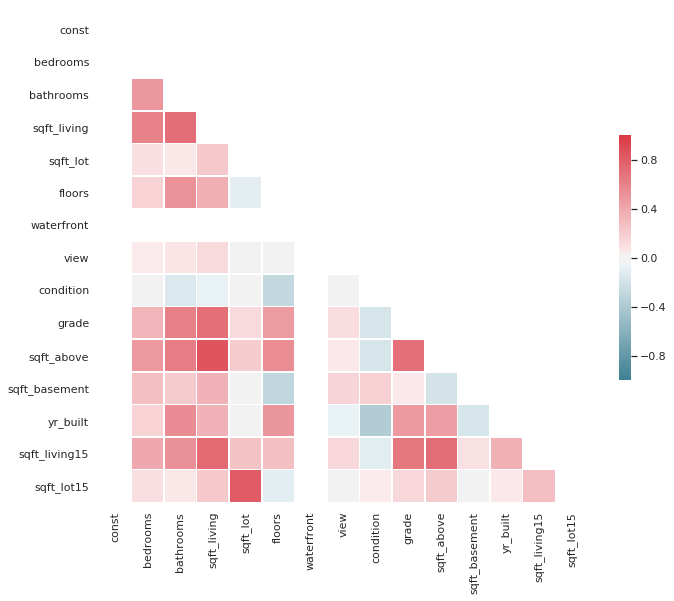

In [26]:
from string import ascii_letters

sns.set(style="white")

# Compute the correlation matrix
corr = sm.add_constant(X).corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [29]:
#based on our VIF results, none show values > 5 and the regressors don't show collinearity with other explanatory variables 
#according to our correlation matrix regressors "sqrt_living" and "floors" show highest levels of multi-colinearity 

pd.Series(vif, XX.columns)

const            8344.691191
bedrooms            1.700256
bathrooms           3.010785
sqft_living              inf
sqft_lot            3.045961
floors              2.082484
waterfront               NaN
view                1.063308
condition           1.202054
grade               2.696954
sqft_above               inf
sqft_basement            inf
yr_built            1.911507
sqft_living15       2.718360
sqft_lot15          3.110850
dtype: float64

## 2.3 If you have variables with high Variance Inflation Factors, try excluding them from your regression. Do your standard errors improve? (get smaller). If high levels of multicollinearity are removed, the precision of the dataset should increase.

In [0]:
#our standard error values are all already minimal 

## 2.4 Recalculate your regression using Robust Standard Errors? What happens to your standard errors?

In [31]:
# to use Robust Standard Errors pass:
# cov_type='HC3' parameter to .fit() function

X5 = df[features] 

y5 =  df[target]

model = sm.OLS(y5, sm.add_constant(X5))
results = model.fit(cov_type='HC3')
print(results.summary())

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.572
Model:                            OLS   Adj. R-squared:                  0.572
Method:                 Least Squares   F-statistic:                     2283.
Date:                Wed, 01 May 2019   Prob (F-statistic):               0.00
Time:                        22:50:35   Log-Likelihood:                -4401.6
No. Observations:               19628   AIC:                             8829.
Df Residuals:                   19615   BIC:                             8932.
Df Model:                          12                                         
Covariance Type:                  HC3                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            21.7895      0.197    110.872

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:1532: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 14, but rank is 12
  'rank is %d' % (J, J_), ValueWarning)


## 2.5 Use scatterplots or Seaborn's pairplot functionality to perform an eyeball test for potential variables that would be candidates for generating polynomial regressors. 

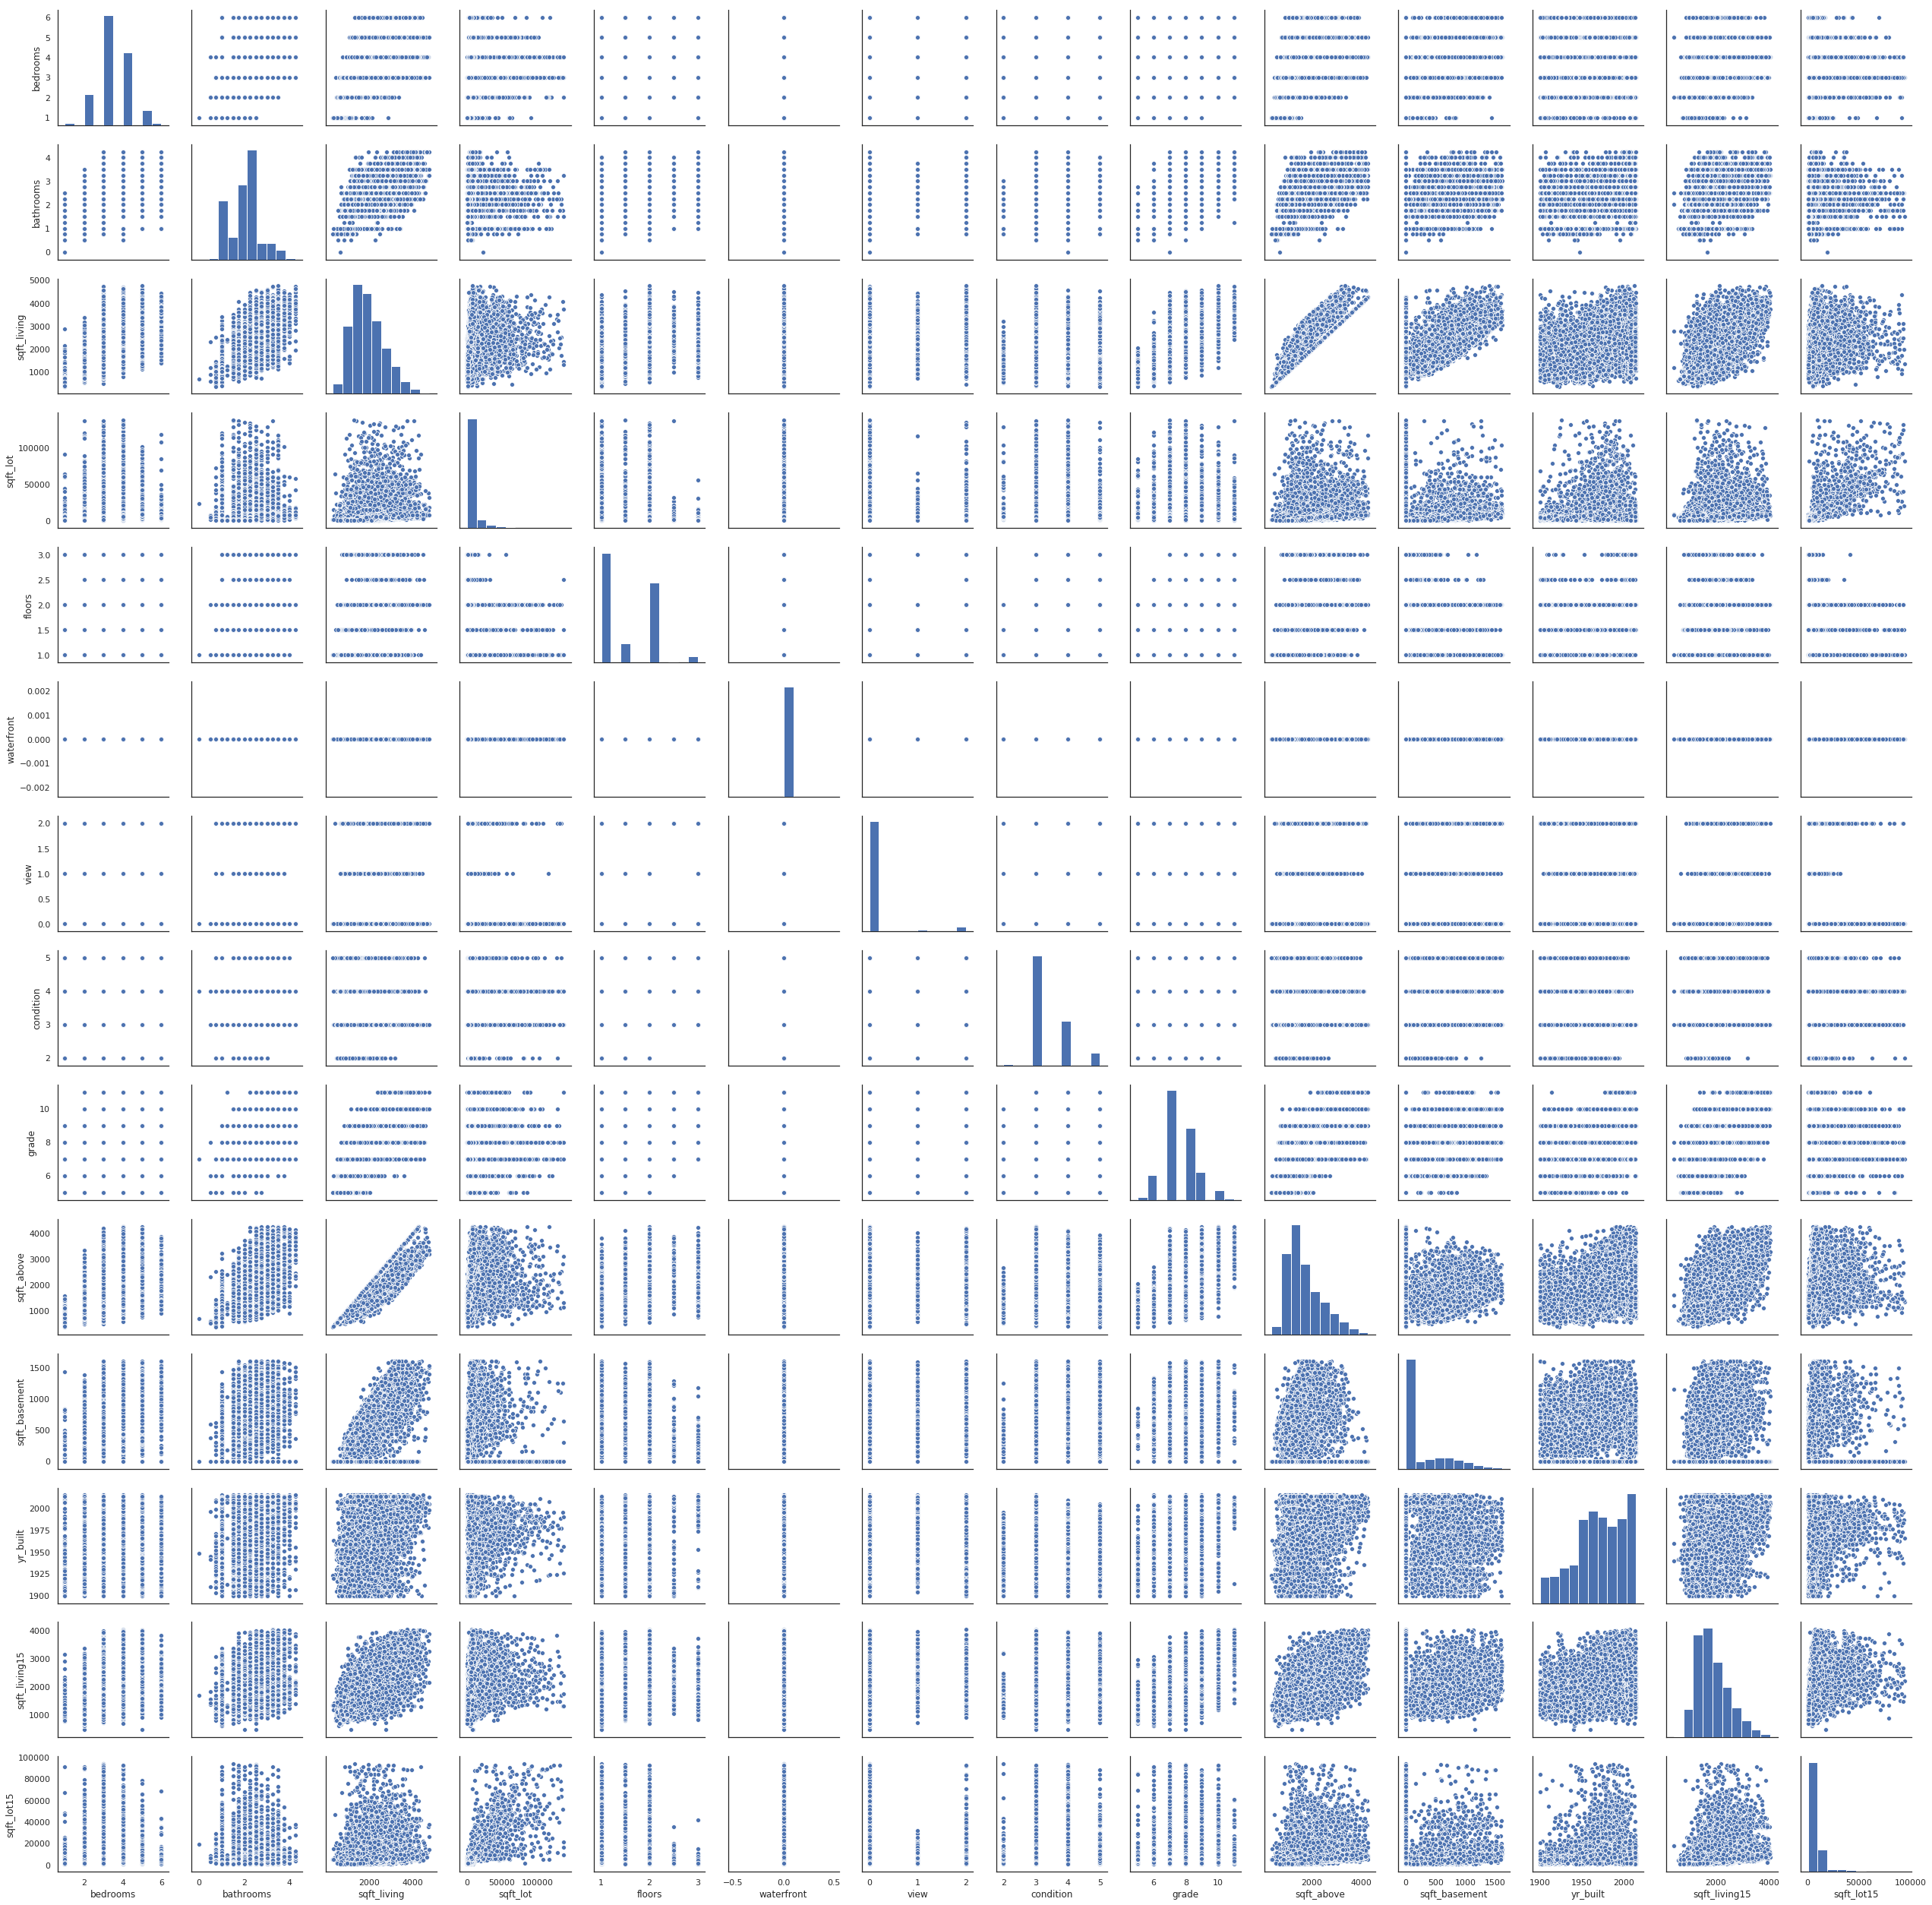

In [32]:
sns.pairplot(data=df[features])


## 2.6 Use seaborn's residplot to plot the distribution of each x variable's residuals. Does these plots indicate any other features that would be potential candidates for polynomial features.

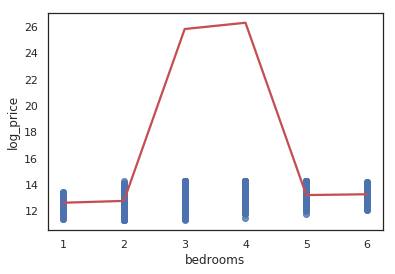

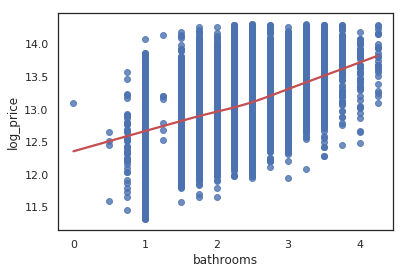

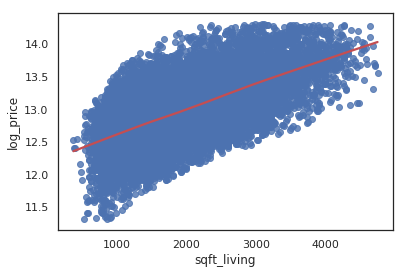

/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:3405: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/smoothers_lowess.py:165: RuntimeWarning: invalid value encountered in greater_equal
  res = _lowess(y, x, frac=frac, it=it, delta=delta)


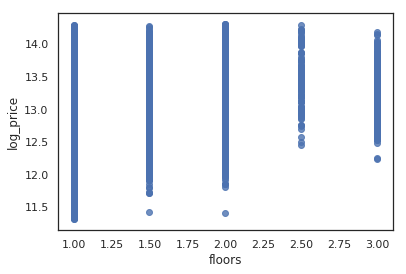

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/smoothers_lowess.py:165: RuntimeWarning: invalid value encountered in true_divide
  res = _lowess(y, x, frac=frac, it=it, delta=delta)


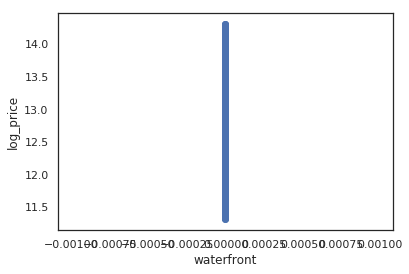

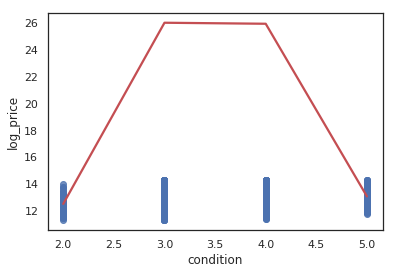

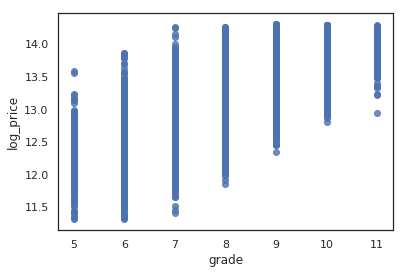

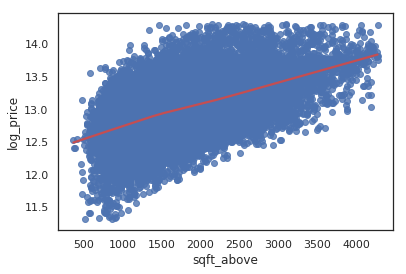

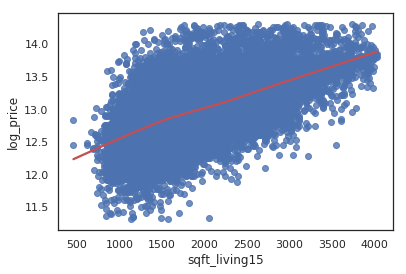

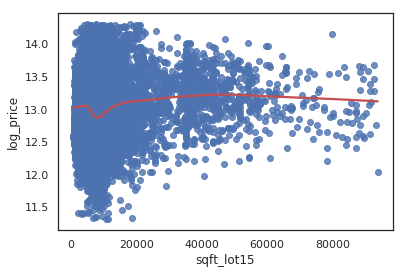

In [33]:
features = [
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'floors',
 'waterfront',
 'condition',
 'grade',
 'sqft_above',
 'sqft_living15',
 'sqft_lot15']

for feature in features:
  sns.regplot(X[feature], y["log_price"], data=df, lowess=True, line_kws=dict(color='r'))
  plt.show()

## 2.6 Feature Engineer the appropriate polynomial features from your analysis above and include them in one final log-polynomial, robust standard error, regression. Do the coefficients of this most advanced regression match your intuition better than the coefficients of the very first regression that we ran with the Statmodels library?

In [0]:
#coefficients don't follow intuition as I would have thought 
#r-squared score has improved

df["sqft_living_squared"] = df["sqft_living"]**2  
df["bathrooms_squared"] = df["bathrooms"]**2  

In [37]:
features = [
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'floors',
 'waterfront',
 'condition',
 'grade',
 'sqft_above',
 'sqft_living15',
 'sqft_lot15',
 'sqft_living_squared',
 'bathrooms_squared']


X5 = df[features] 

y6 = df[target]

model = sm.OLS(y6, sm.add_constant(X5))
results = model.fit(cov_type='HC3')
print(results.summary())

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.503
Model:                            OLS   Adj. R-squared:                  0.503
Method:                 Least Squares   F-statistic:                     592.6
Date:                Wed, 01 May 2019   Prob (F-statistic):               0.00
Time:                        22:53:44   Log-Likelihood:                -5868.0
No. Observations:               19628   AIC:                         1.176e+04
Df Residuals:                   19616   BIC:                         1.185e+04
Df Model:                          11                                         
Covariance Type:                  HC3                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  10.8783    

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:1532: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 12, but rank is 10
  'rank is %d' % (J, J_), ValueWarning)


# Stretch Goals

- Research the assumptions that are required for OLS to be BLUE the "Best Linear Unbiased Estimator". You might try searching and trying to understand the conditions of what's called the Gauss-Markov Theorem.
- Research other diagnostic tests. Can you show that residuals are normally distributed graphically?
- Write a blog post about inferential modeling using linear regression.